In [46]:
import pandas as pd
import numpy as np
import torch
import torch_geometric
import itertools
import networkx as nx
from matplotlib.pyplot import figure
from math import radians, cos, sin, asin, sqrt
from haversine import haversine, Unit
import warnings
warnings.filterwarnings("ignore")

In [54]:
#Misc Code 

#G = nx.Graph()
#G = nx.from_pandas_edgelist(cali_drive.head(), '2020-01-14', '2020-01-15')

#figure(figsize=(10, 8))
#nx.draw_shell(G, with_labels=True)

## Utils

def g100(n): 
    if n >= 100: 
        return 1
    return 0

def get_edge_attributes(G, df, date):
    """
    Setting edge attributes between all nodes in
    graph G from specified dataframe column.
    """
    
    for pair in itertools.product(list(G.nodes()), repeat=2):
        
        #Pair is the node
        
        lat1 = df[df[date] == pair[0]]['Latitude']
        long1 = df[df[date] == pair[0]]['Longitude']
        
        lat2 = df[df[date] == pair[1]]['Latitude']
        long2 = df[df[date] == pair[1]]['Longitude']
        
        coord1 = (lat1, long1)
        coord2 = (lat2, long2)
        
        G.add_edge(pair[0], pair[1] , weight = haversine(coord1, coord2, unit = 'mi'))
        
    return G

In [55]:
df = pd.read_csv('applemobilitytrends-2021-10-03.csv') #Read apple maps datao set
coord_df = pd.read_csv('cal_cities_lat_long.csv') #Read coordinate dataset
coord_df = coord_df.rename(columns={'Name': 'region'}) #Rename to match column names

cali = df[df['sub-region'] == 'California'] #Cali
cali_drive = cali[cali['transportation_type'] == 'driving'].reset_index(drop = True) #Only include driving data
cali_drive = cali_drive.merge(coord_df, how='inner', on='region') #Merge lat long coordinates into cali_drive
cali_drive.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,Latitude,Longitude
0,city,Antioch,driving,NaN,California,United States,100.0,100.70,100.63,100.34,...,130.71,137.71,146.37,149.50,152.24,173.24,180.73,131.03,38.004922,-121.805789
1,city,Bakersfield,driving,NaN,California,United States,100.0,106.55,113.47,113.40,...,135.01,155.53,158.25,164.89,175.34,234.94,198.60,143.04,35.373292,-119.018711
2,city,Concord,driving,NaN,California,United States,100.0,104.74,104.73,102.22,...,102.43,112.10,120.98,133.58,134.03,146.53,139.98,100.79,37.977978,-122.031072
3,city,Dublin,driving,NaN,California,United States,100.0,103.22,105.86,105.08,...,131.13,113.65,115.97,120.86,128.80,161.31,157.71,119.66,37.702153,-121.935792
4,city,Fairfield,driving,NaN,California,United States,100.0,102.26,105.22,103.83,...,145.97,137.09,130.51,132.96,142.11,184.48,198.73,149.86,38.249358,-122.039967


In [72]:
cali_drive

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,Latitude,Longitude
0,city,Antioch,driving,NaN,California,United States,100.0,100.70,100.63,100.34,...,130.71,137.71,146.37,149.50,152.24,173.24,180.73,131.03,38.004922,-121.805789
1,city,Bakersfield,driving,NaN,California,United States,100.0,106.55,113.47,113.40,...,135.01,155.53,158.25,164.89,175.34,234.94,198.60,143.04,35.373292,-119.018711
2,city,Concord,driving,NaN,California,United States,100.0,104.74,104.73,102.22,...,102.43,112.10,120.98,133.58,134.03,146.53,139.98,100.79,37.977978,-122.031072
3,city,Dublin,driving,NaN,California,United States,100.0,103.22,105.86,105.08,...,131.13,113.65,115.97,120.86,128.80,161.31,157.71,119.66,37.702153,-121.935792
4,city,Fairfield,driving,NaN,California,United States,100.0,102.26,105.22,103.83,...,145.97,137.09,130.51,132.96,142.11,184.48,198.73,149.86,38.249358,-122.039967
5,city,Fresno,driving,NaN,California,United States,100.0,98.62,105.42,102.86,...,117.54,138.58,143.61,145.22,151.00,177.32,162.90,118.01,36.746842,-119.772586
6,city,Indian Wells,driving,NaN,California,United States,100.0,101.05,111.16,114.89,...,113.77,116.09,114.79,117.03,122.33,163.03,144.82,119.08,33.717631,-116.340756
7,city,Los Angeles,driving,LA,California,United States,100.0,105.93,112.23,111.73,...,118.41,126.34,130.85,135.24,145.83,168.46,159.31,121.68,34.052233,-118.243686
8,city,Modesto,driving,NaN,California,United States,100.0,98.64,100.81,101.50,...,113.98,135.12,133.31,135.37,142.40,172.68,151.22,113.91,37.639097,-120.996878
9,city,Monterey,driving,NaN,California,United States,100.0,93.97,99.86,99.91,...,167.16,149.89,156.49,154.11,151.30,186.20,211.15,174.04,36.600239,-121.894675


In [71]:
coord_df[coord_df['region'] == 'Indian Wells']

,region,Latitude,Longitude
180,Indian Wells,33.717631,-116.340756


In [57]:
G = nx.Graph()
#G.add_nodes_from(cali_drive['region'])
G.add_nodes_from(cali_drive['2020-01-14'])
#nx.set_node_attributes(G, cali_drive['2020-01-14'])


get_edge_attributes(G, cali_drive, '2020-01-14')

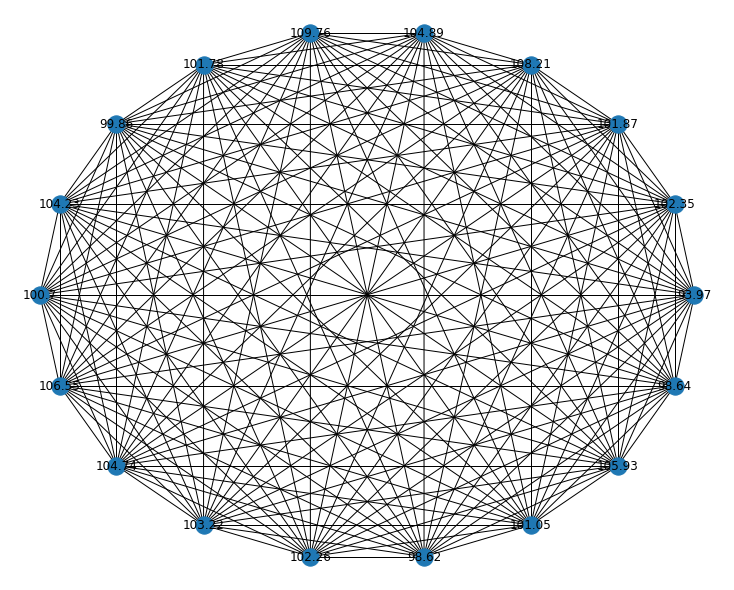

In [58]:
# Plot it
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [62]:
G.get_edge_data

<bound method Graph.get_edge_data of <networkx.classes.graph.Graph object at 0x7f858265ad30>>

In [75]:
G[103.22][103.22]["weight"]

0.0